# Students Performance in Exams

다양한 과목에서 학생들이 받은 점수를 모아놓은 데이터를 가지고 점수가 어떤 영향들과 상관관계가 있는지 알아볼 것이다.

*   참고 자료: https://www.kaggle.com/spscientist/students-performance-in-exams
*   http://roycekimmons.com/tools/generated_data/exams


**CONTENT**

This data set consists of the marks secured by the students in various subjects.

**INSPIRATION**

To understand the influence of the parents background, test preparation etc on students performance


In [0]:
# 연산을 하기 위해 판다스 불러오기
import pandas as pd

import matplotlib as plt
import seaborn as sns

plt.style.use('dark_background')
sns.set(style = 'darkgrid', palette = 'bright', font_scale = 1.5)

import matplotlib.pyplot as plt

In [12]:
df_sp = pd.read_csv('StudentsPerformance.csv')
df_sp.head()

# 데이터셋이 어떤 정보를 포함되었는지 보았더니, 우리가 봐야할 것은 parental level of education, lunch, test preparation course를 볼 수 있다.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
# 데이터의 요약을 출력해본다.
df_sp.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


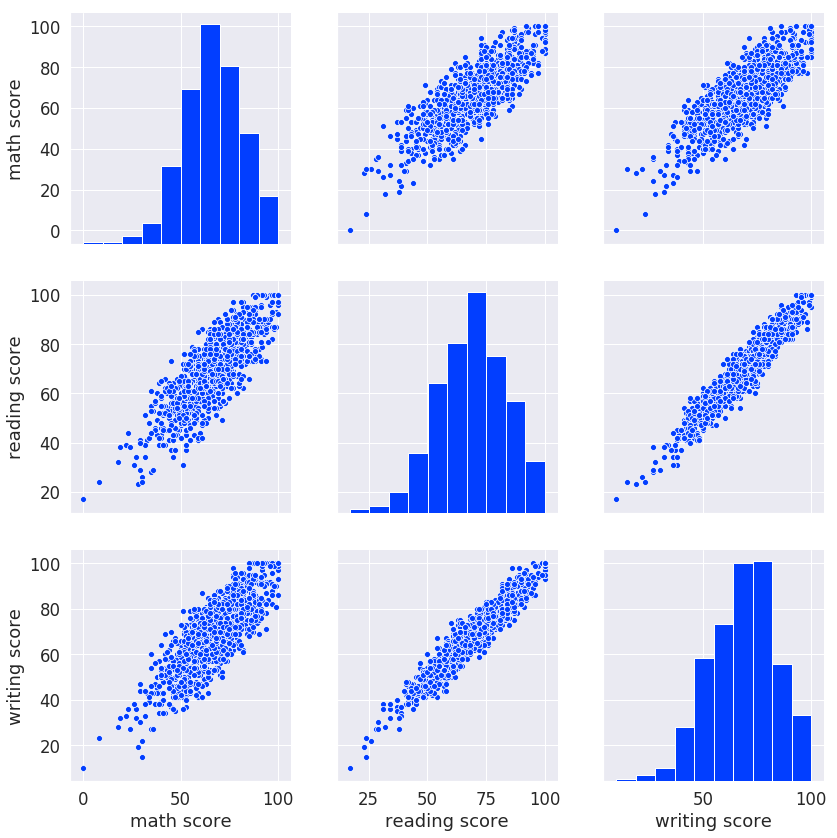

In [14]:
# pairplot은 상관관계를 그려볼 것이다.
sns.pairplot(df_sp[['math score', 'reading score', 'writing score']], height = 4)

# math score, reading score, writing score간의 상관관계 점수를 본다. 뽀족할수록 상관관계가 높은 것입니다.

In [0]:
# math, reading, writing의 평균점수를 구하기
def average_score(dt):
  return (dt['math score'] + dt['reading score'] + dt['writing score'])/3

# 3과목의 점수의 평균을 구하여 데이터프레임의 average score에 담아줌
df_sp['average score'] = df_sp.apply(average_score, axis = 1)

In [16]:
df_sp.head()
# average score가 잘 저장되었는지 확인할 수 있다.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Text(0.5, 1.0, 'writing')

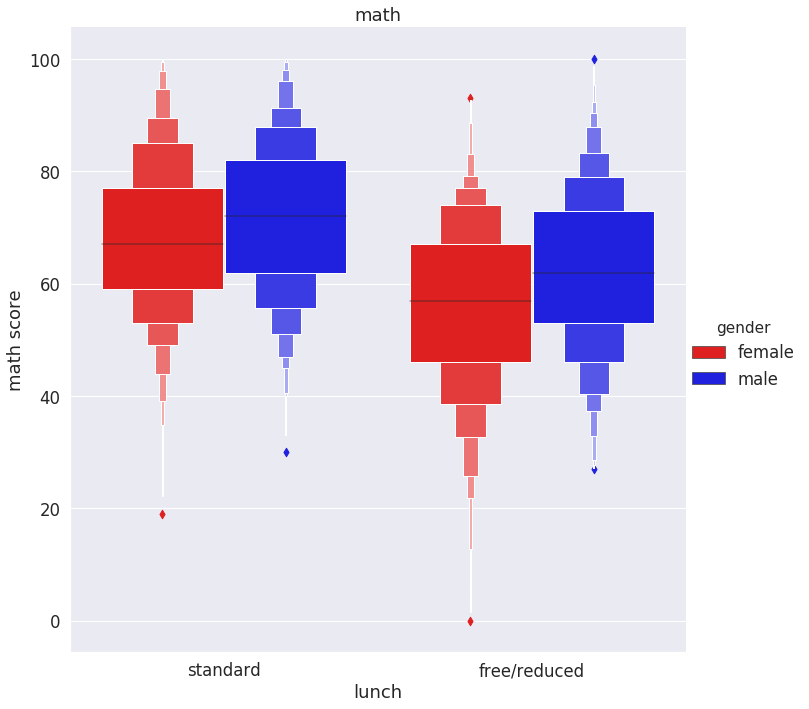

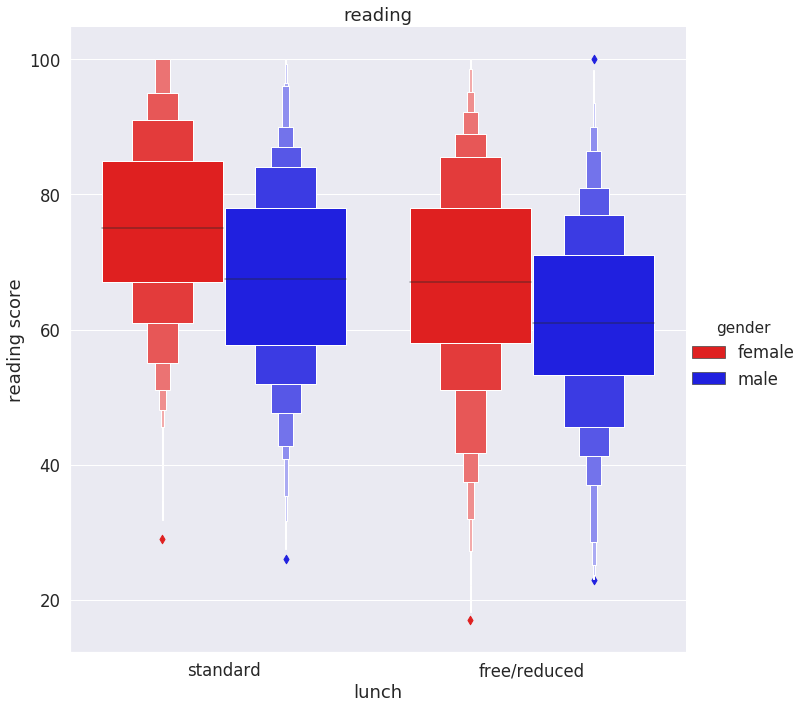

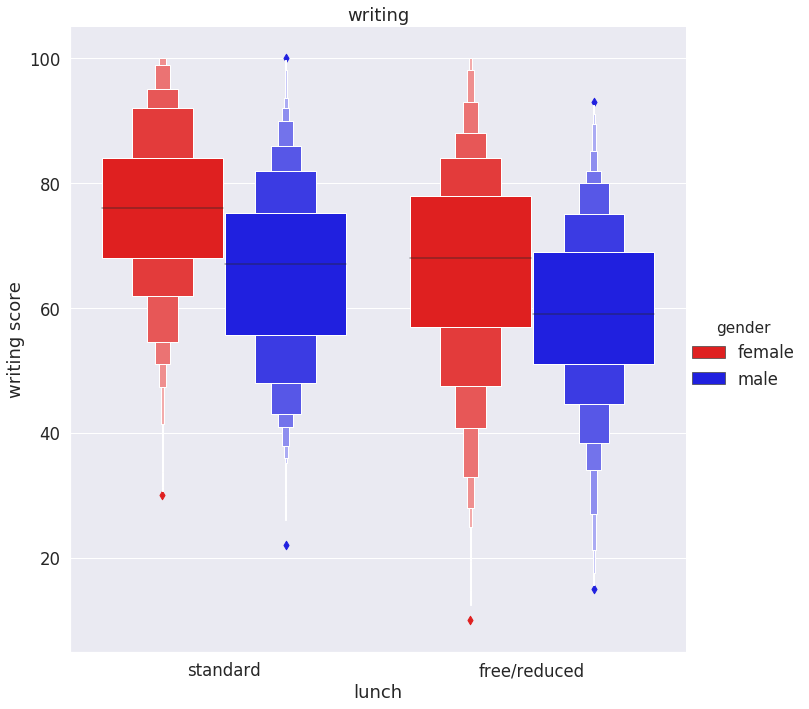

In [17]:
# 점심을 먹었는지에 따라 점수에 어떤 영향이 있는지 시각화하기
# seaborn의 categorical plot을 사용할 것이다.
# boxen은 대용량의 형태의 그래프를 그릴 때 용이하다.
# 본 그래프는 점심식사가 math score, reading score, writing score에 미치는 영향을 그려본 것이다.
sns.catplot(x = 'lunch', y = 'math score', hue = 'gender', kind = 'boxen', data = df_sp, height = 10,
           palette = sns.color_palette(['red', 'blue']))

plt.title('math')

sns.catplot(x = 'lunch', y = 'reading score', hue = 'gender', kind = 'boxen', data = df_sp, height = 10,
           palette = sns.color_palette(['red', 'blue']))

plt.title('reading')

sns.catplot(x = 'lunch', y = 'writing score', hue = 'gender', kind = 'boxen', data = df_sp, height = 10,
           palette = sns.color_palette(['red', 'blue']))

plt.title('writing')

# 수학의 경우, 남자가 더 점수가 높은데, 왼쪽은 점심을 먹은거고, 오른쪽은 점심을 안먹은 것이다. 결국 영향을 미친다는 것이다.

Text(0.5, 1.0, 'average')

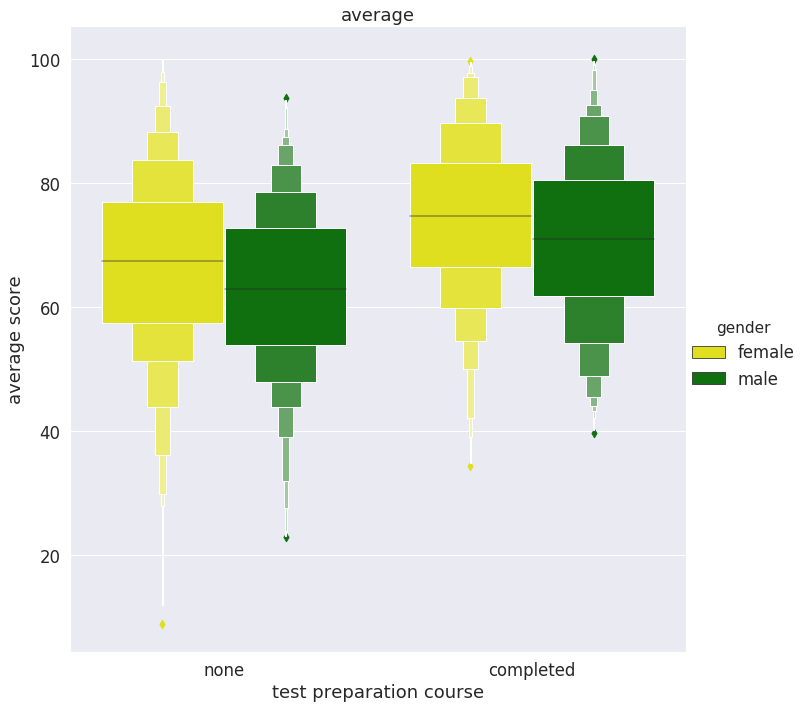

In [20]:
# Test Preparation Course(시험준비 과목과 점수의 상관관계)
sns.catplot(x = 'test preparation course', y = 'average score', hue = 'gender', kind = 'boxen', data = df_sp, height = 10,
           palette = sns.color_palette(['yellow', 'green']))

plt.title('average')

# 왼쪽은 시험을 위한 코스를 듣지 않은 사람, 오른쪽은 시험을 위한 코스를 들은 사람인데, 시험준비를 위해 들은사람들이 평균이 높다.
# 전체적으로 여자들이 평균점수가 높다.

No handles with labels found to put in legend.


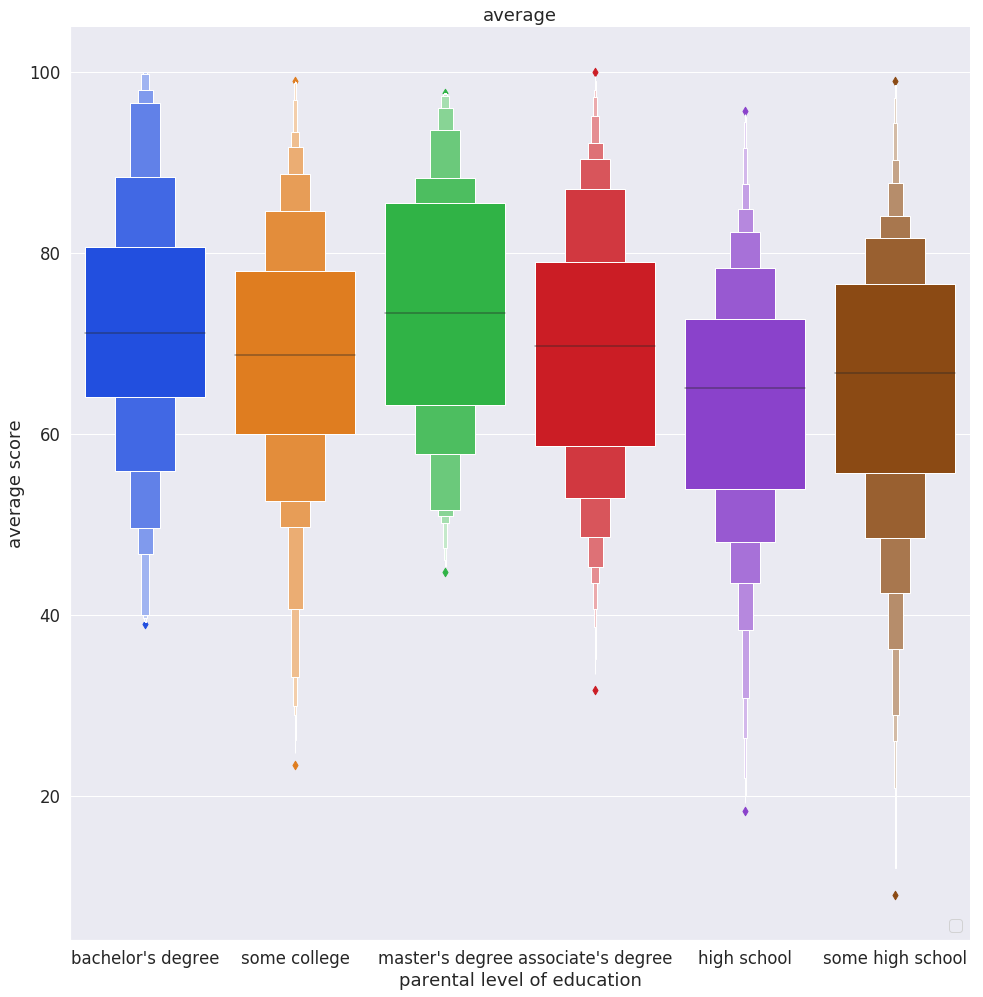

In [22]:
# Parental Level of Education(부모의 학력에 따른)
sns.catplot(x = 'parental level of education', y = 'average score', kind = 'boxen', data = df_sp, height = 14)

plt.title('average')

plt.legend(loc = 'lower right')

# 파란색(학사학위), 주황색(전문학사), 초록색(석사학위), 빨간색(준학사학위)
# 부모님의 학력에 영향을 약간 미치는 듯합니다.